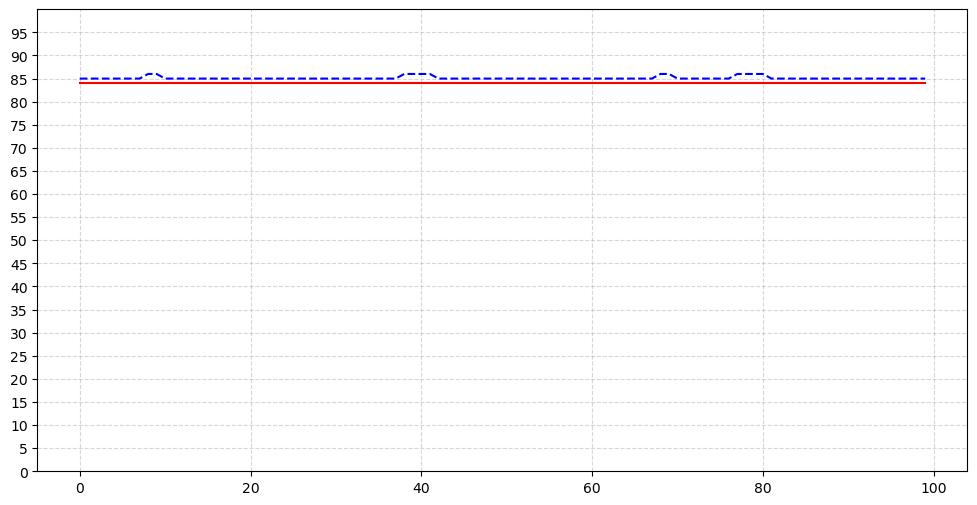

In [ ]:
import paho.mqtt.client as paho
from IPython.display import display, clear_output, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ytick = [t*5 for t in range(20)]
ylabel = [str(t) for t in ytick]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_ylim([0,100])
ax.set_yticks(ytick, ylabel)
plt.grid(True, alpha=0.5, linestyle='--')

i=0
data_size = 100
data={'LEVEL_SENSOR':[0 for i in range(data_size)], 'LEVEL_AI':[0 for i in range(data_size)]}


def on_message(mosq, obj, msg):
    global i
    if len(data[msg.topic])>=data_size:
        data[msg.topic] = data[msg.topic][1:]
    data[msg.topic].append(float(msg.payload))
    other = 'LEVEL_SENSOR'
    if msg.topic == other:
        other = 'LEVEL_AI'
    if len(data[other])>=data_size:
        data[other] = data[other][1:]
    data[other].append(data[other][-1])
    
    mosq.publish('pong', 'ack', 0)
    ax.clear()
    ax.set_ylim([1,100])
    ax.set_yticks(ytick, ylabel)
    plt.grid(True, alpha=0.5, linestyle='--')

    ax.plot(data['LEVEL_SENSOR'],'r', data['LEVEL_AI'],'b--')
    #ax.plot(matrix[i, :])
    #i=i+1
    #i=i%m
    
    display(fig)
    clear_output(wait=True)
    #plt.pause(0.2)

def on_publish(mosq, obj, mid):
    pass

client = paho.Client('jupyter')
client.on_message = on_message
client.on_publish = on_publish

client.connect("127.0.0.1", 1883, 60)

client.subscribe("LEVEL_AI", 0)
client.subscribe("LEVEL_SENSOR", 0)

while client.loop() == 0:
    pass
